In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import joblib
from matplotlib import colors

In [4]:
%config Completer.use_jedi = False

In [5]:
cm = 1/2.54  # centimeters in inches
barCol      = [134/255,190/255,181/255] #vert
crevasseCol = [211/255,131/255,86/255]  #light blue
palustreCol = [33/255,131/255,126/255]  #teil
chenalCol   = [212/255,189/255,125/255] #beige
floodCol    = [42/255,88/255,126/255]   #bleu
fanCol      = [111/255,136/255,145/255] #grey
#floodCol   = [223/255,232/255,232/255]  
white = [255,255,255]

col3f = [fanCol, chenalCol,floodCol]
col5f = [fanCol, chenalCol, barCol, crevasseCol, floodCol]
col6f = [floodCol,palustreCol,crevasseCol,barCol,chenalCol,fanCol]

cmap_3f = colors.ListedColormap(col3f)
cmap_5f = colors.ListedColormap(col5f)
cmap_6f = colors.ListedColormap(col6f)

## Visu 2d inputs

In [6]:
grid_list        = []
trend_img_list_1 = []
trend_img_list_2 = []
ti_list          = []
rot_out_list     = []
hd_list          = []

for i in range(4):
    path = '/home/valentin/galileo/galileo_mount/2021/simu_roussillon/mps/6f/00_simulation_mps/data/2023/data_int{}_6f.pickle'.format(i)
    data = joblib.load(path)
    grid, trend_1, trend_2, rot, hd = data
    
    grid_list.append(grid)
    trend_img_list_1.append(trend_1)
    trend_img_list_2.append(trend_2)
    rot_out_list.append(rot)
    hd_list.append(hd)

In [7]:
path_ti_set = '/home/valentin/galileo/galileo_mount/2021/simu_roussillon/mps/6f/00_simulation_mps/data/set_ti/'
ti_list     = []

for i in range(4):
    rd = np.random.randint(0,100)
    ti = joblib.load(path_ti_set+'int_{}_ti/ti_6f_int{}_{:03d}.pickle'.format(i,i,rd))
    ti_list.append(ti)

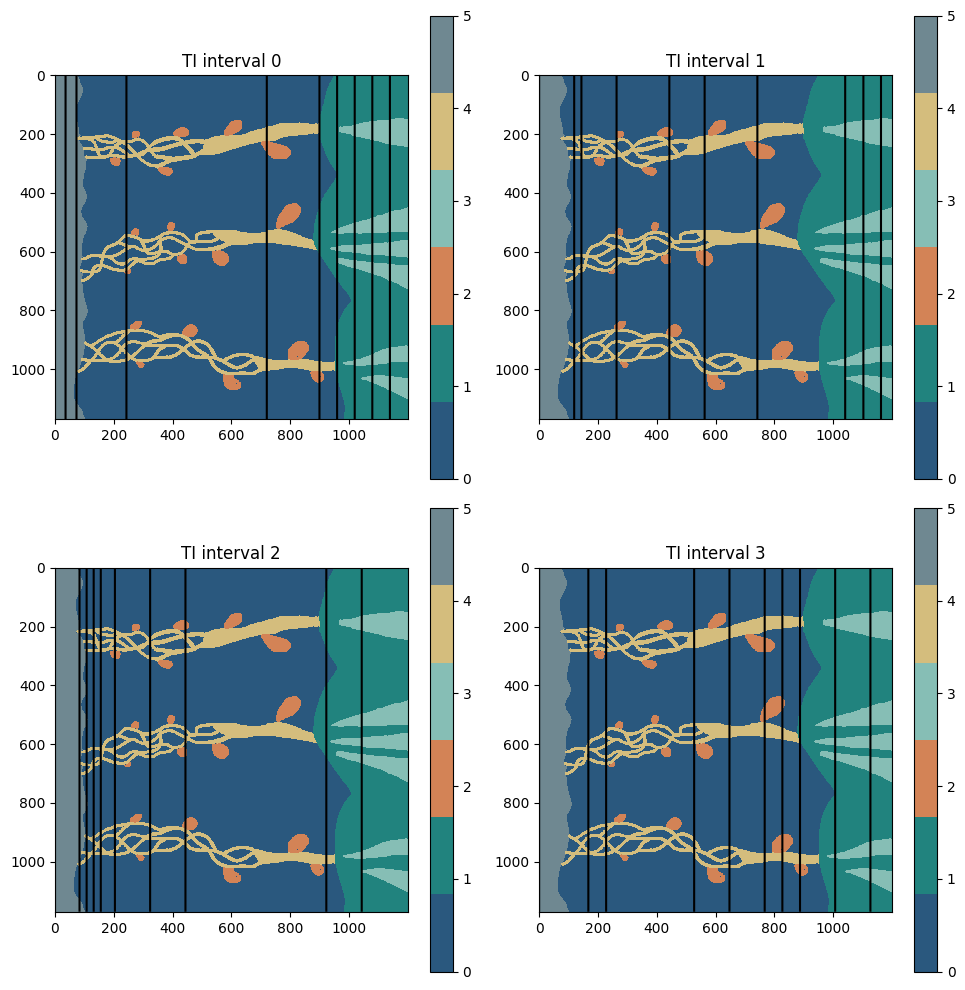

In [29]:
plt.subplots(2,2,figsize=(10,10))
count = 0
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(ti_list[i].val[2][0],cmap=cmap_6f, interpolation='None')    
    plt.colorbar()
    plt.contour(ti_list[i].val[0][0],np.linspace(0,1,11),colors='black')
    plt.title('TI interval {}'.format(i))
    
plt.tight_layout()
#plt.savefig('99_images/ti_intervals.png', bbox_inches='tight')

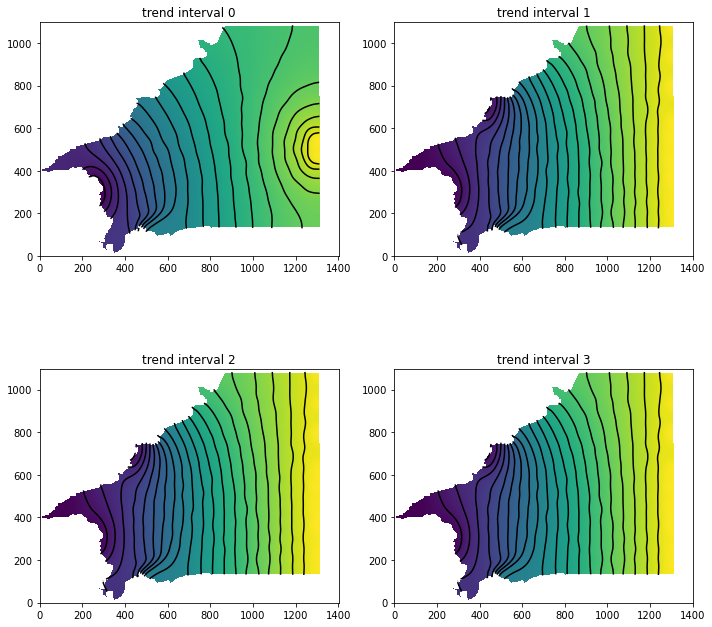

In [10]:
plt.subplots(2,2,figsize=(10,10))
count = 0
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(trend_img_list_1[i].val[0][0],origin='lower')
    plt.contour(trend_img_list_1[i].val[0][0],np.linspace(0,1,22),colors='black')
    
    plt.title('trend interval {}'.format(i))
    
plt.tight_layout()
plt.savefig('99_images/trend_intervals.png', bbox_inches='tight')

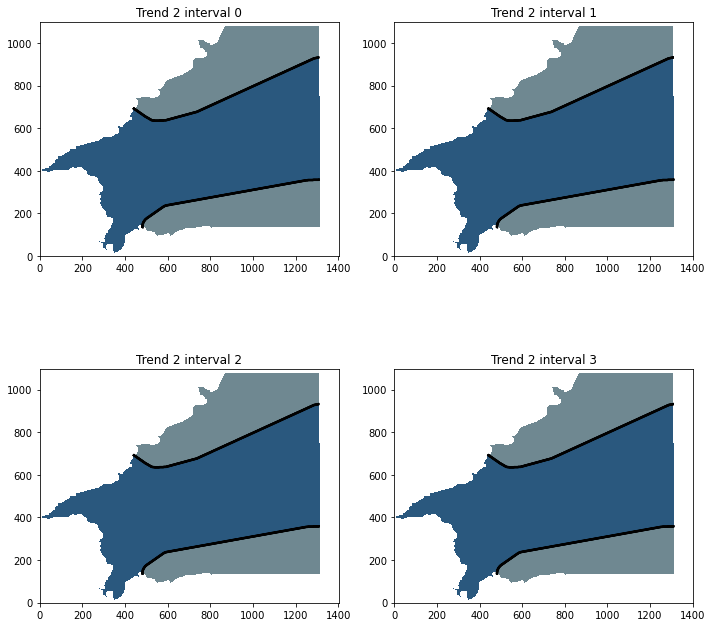

In [11]:
plt.subplots(2,2,figsize=(10,10))
count = 0
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(trend_img_list_2[i].val[0][0],cmap=cmap_6f,origin='lower')
    plt.contour(trend_img_list_2[i].val[0][0],np.linspace(0,1,11),colors='black')
    
    plt.title('Trend 2 interval {}'.format(i))
    
plt.tight_layout()
plt.savefig('99_images/trend_2_intervals.png', bbox_inches='tight')

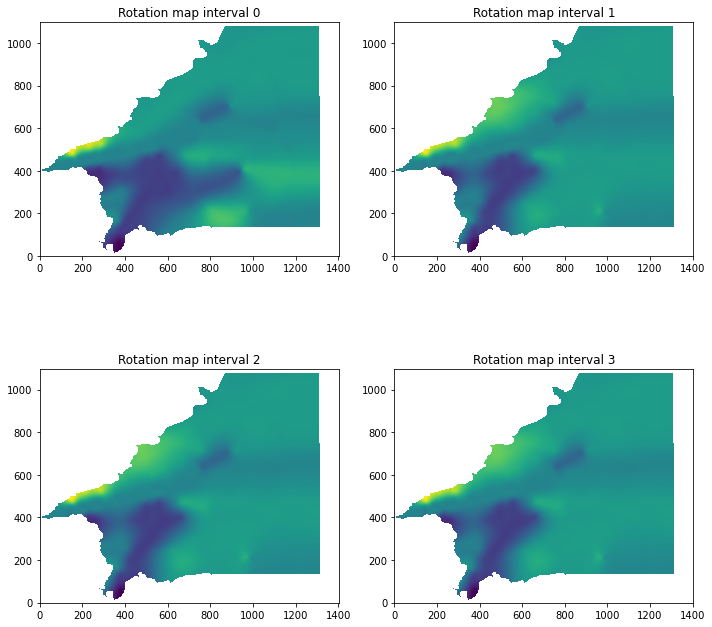

In [12]:
plt.subplots(2,2,figsize=(10,10))
count = 0
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(rot_out_list[i][0][0],origin='lower')
    
    plt.title('Rotation map interval {}'.format(i))
    
plt.tight_layout()
plt.savefig('99_images/rotation_map_intervals.png', bbox_inches='tight')

In [25]:
mask_vizu = np.copy(rot_out_list[0][0][0])
mask_vizu[~np.isnan(mask_vizu)] = 1

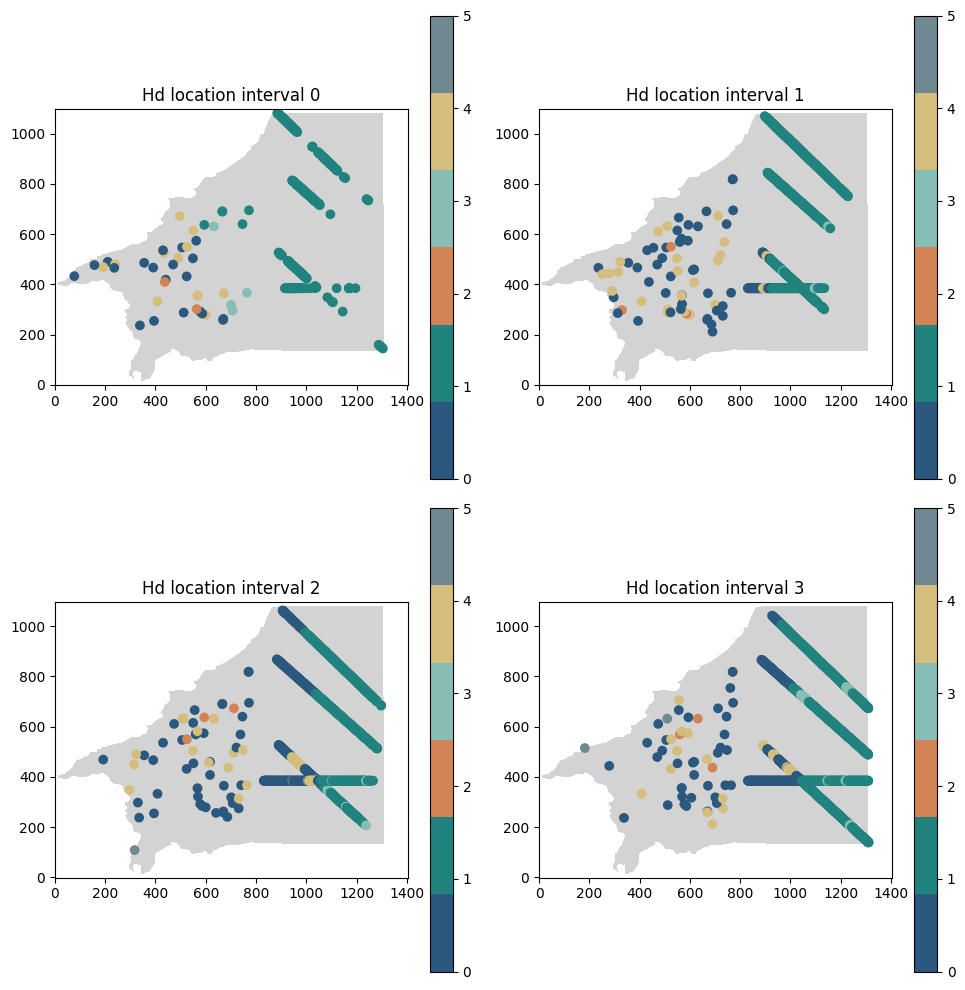

In [27]:
from matplotlib import colors

plt.subplots(2,2,figsize=(10,10))

#plot domain and piezometer number
cmap       = colors.ListedColormap(['lightgrey'])
boundaries = [-1, 1]
norm       = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
shrink_values = 0.5


for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(mask_vizu,cmap=cmap, norm=norm, origin='lower')
    plt.scatter(hd_list[i].X[hd_list[i].Z==0],hd_list[i].Y[hd_list[i].Z==0],c=hd_list[i].facies[hd_list[i].Z==0],cmap=cmap_6f,vmin=0,vmax=5)
    plt.title('Hd location interval {}'.format(i))
    plt.colorbar()
plt.tight_layout()
plt.savefig('99_images/hd_location_intervals.png', bbox_inches='tight')

In [22]:
import json
def read_json(path):
    '''
    to read dictionnary as json file
    '''
    
    with open(path,'r')as f:
        file = json.load(f)
        
    return file

In [23]:
path_json = '/home/valentin/galileo/galileo_mount/2021/simu_roussillon/mps/6f/00_simulation_mps/data/param_mps_6f_2021.json'
read_json(path_json)

{'nx': 1404,
 'ny': 1097,
 'nz': 1,
 'sx': 1,
 'sy': 1,
 'sz': 1,
 'ox': -0.5,
 'oy': -0.5,
 'oz': -0.5,
 'nv': 3,
 'varname': ['trend_1', 'trend_2', 'facies'],
 'out_flag': [False, False, True],
 'interval': 5,
 'snp': [[1, 1, 1], [1, 1, 1], [500, 500, 1]],
 'use_rotation': 2,
 'rotation_azy_loc': True,
 'dist_type': [1, 1, 0],
 'nb_nodes': [1.0, 1.0, 24.0],
 'dist_t': [0.005, 0.01, 0.0025],
 'weight_f': [1.0, 1.0, 10.0],
 'scan_f': [0.5],
 'sampling_rate': 7.5e-05,
 'facies_to_sample': [0, 3, 4],
 'nb_facies_tot': 6}

## Visu 2d simulation

In [20]:
import gc
gc.collect()

37202

In [15]:
test_set  = 4
simu_list = []
for i in range(4):
    path_simu  = '/home/valentin/galileo/galileo_mount_data/new_grid_2022/simu_out_new_grid_mps/simu_{}_{}.pickle'.format(i, test_set)
    path_simu = '/home/valentin/galileo/galileo_mount/2021/simu_roussillon/mps/6f/00_simulation_mps/simu_out/simu_{}_{:02}.pickle'.format(i, test_set)
    simu = joblib.load(path_simu)
    simu_list.append(simu[:,0,:,])
    print(simu.shape)
    
simu_test = np.concatenate(simu_list, axis=0)
simu_test.shape

(1, 18, 1097, 1404)
(1, 18, 1097, 1404)
(1, 24, 1097, 1404)
(1, 48, 1097, 1404)


(4, 1097, 1404)

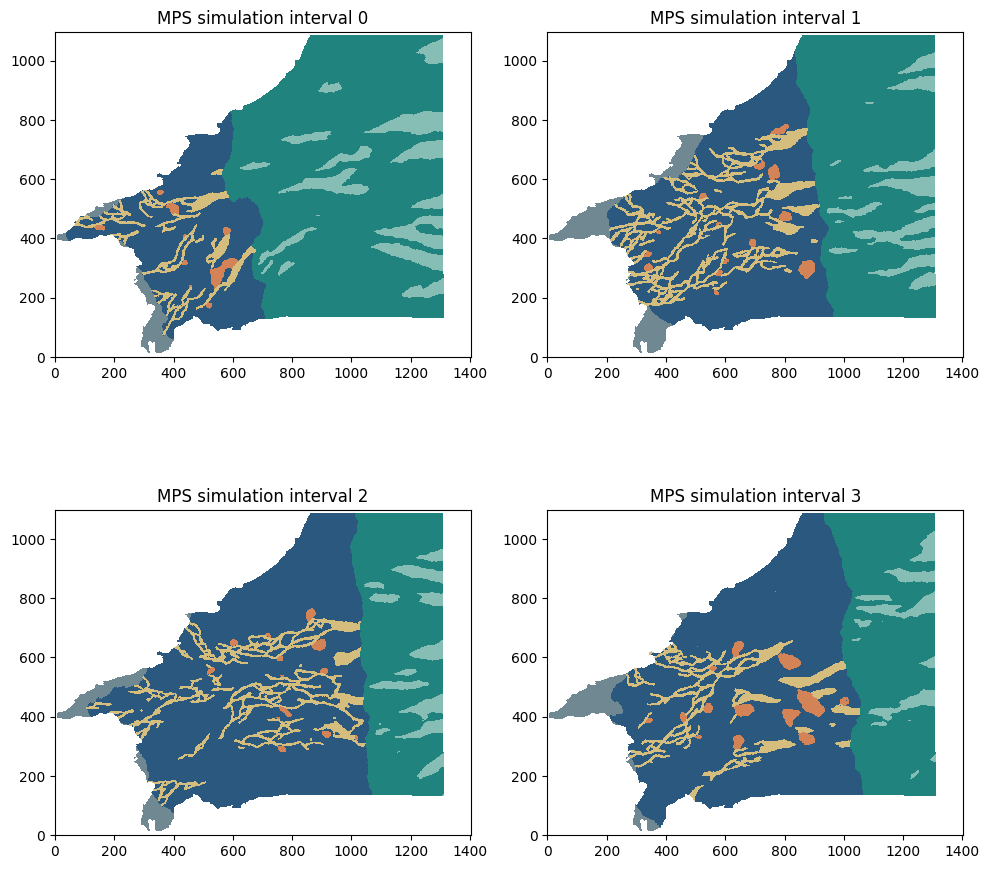

In [19]:
count = 0
plt.subplots(2,2,figsize=(10,10))

for i in range(4):
    plt.subplot(2,2,count+1) 
    plt.title('interval {}'.format(count+1))
    plt.imshow(simu_test[i],cmap=cmap_6f,origin='lower',interpolation='none')

    count+=1
    plt.title('MPS simulation interval {}'.format(i))
    
plt.tight_layout()
#plt.savefig('99_images/mps_simulation_intervals.png', bbox_inches='tight')

In [41]:
import matplotlib.animation as animation

set_nb    = test_set
nb_frame  = simu_test.shape[1]-1

simu_plt = np.copy(simu_test[0])


# generate expected titles
titles = [ 'Simu mps layer {}; '.format(nb) for nb in range(nb_frame)]

# func which will be applied in order to create a video frame
def func(frame, fig, ax, current_samples, titles):
    
    ax1 = ax[0]
    ax1.clear()
    ax1.imshow(current_samples[frame], cmap=cmap_6f,origin='lower',interpolation='none')
    
    # density will displayed value in an normalized way
    ax1.set_title(titles[frame], fontsize=20)
    #fig.colorbar(cax, ax=ax1, shrink=0.3)
    plt.tight_layout()
    
    return ax

fig = plt.figure(figsize=(15, 10))

# get the subplot to update when generating the animation
ax1 = fig.add_subplot(111)

# create the animation using custom func and its parameters (fargs)
ani = animation.FuncAnimation(fig, func, nb_frame, interval=750,
                              repeat_delay=5000, blit=False,
                              fargs=(fig, [ax1], simu_test[0], titles))

# save the animation into a specific video format
ani.save('99_images/animation_mps_simulation.gif')
plt.close()

MovieWriter ffmpeg unavailable; using Pillow instead.


# Cross section

In [42]:
origin='lower'

In [43]:
simu_list[0].shape

(1, 18, 1097, 1404)

/home/valentin/anaconda3/envs/these/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inchex" which is no longer supported as of 3.3 and will become an error two minor releases later


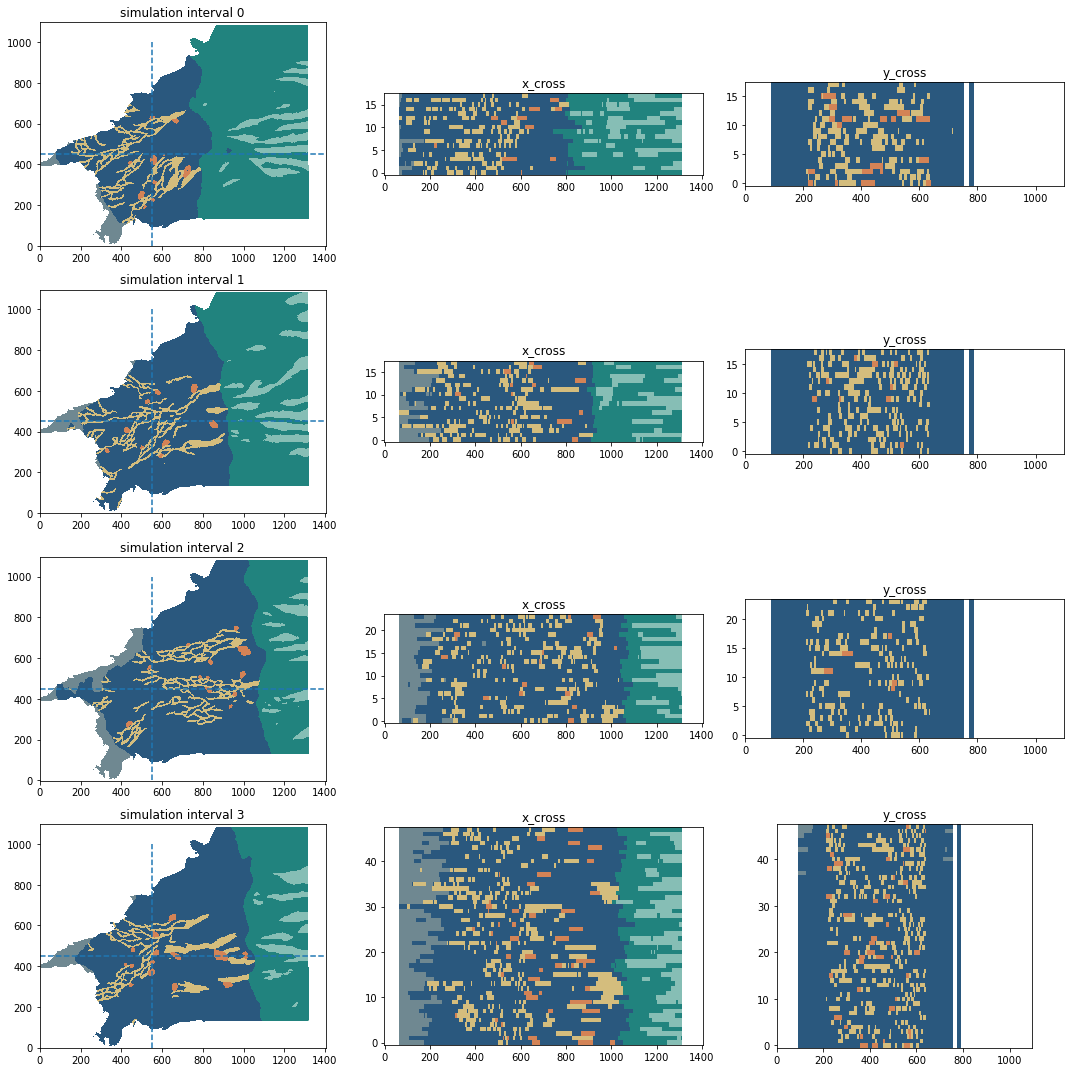

In [44]:
x_cross = 550
y_cross = 450    
plt.subplots(4,3,figsize=(15,15))

for i in range(4):
    simu_cross = simu_list[i]
    plt.subplot(4,3,1+i*3)
    plt.title('simulation interval {}'.format(i))
    plt.imshow(simu_cross[0][0],origin=origin,cmap=cmap_6f,interpolation='none')
    plt.hlines(y_cross,0,1400,linestyles='--')
    plt.vlines(x_cross,0,1000,linestyles='--')
    plt.subplot(4,3,2+i*3)
    plt.title('x_cross')
    plt.imshow(simu_cross[0,:,y_cross,:],origin=origin,aspect=20,cmap=cmap_6f,vmin=0,vmax=5,interpolation='none')
    plt.subplot(4,3,3+i*3)
    plt.title('y_cross')
    plt.imshow(simu_cross[0,:,:,x_cross],origin=origin,aspect=20,cmap=cmap_6f,vmin=0,vmax=5,interpolation='none')
    plt.tight_layout()
plt.savefig('99_images/simu_test_0_cross_section.png'.format(test_set), bbox_inchex='tight', facecolor='white',dpi=300)